## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
def maxmin(x):
    return (x - min(x)) / (max(x) - min(x))

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [23]:
# 1

df = pd.read_csv("./data/airbnb_hw.csv")
adf = df.loc[:,["Price", "Beds", "Number Of Reviews", "Review Scores Rating"]]

p = adf["Price"]
p.unique()
p = p.str.replace(",", "")
p = pd.to_numeric(p, errors="coerce")
adf["Price"] = p

b = adf["Beds"]
b.unique()
# imputing the most likely number of beds that an NAN will be
impute = df.loc[:, ["Property Type", "Beds"]]
pd.crosstab(df["Property Type"], df["Beds"])
getnull = impute.loc[impute["Beds"].isna()]
getnull = getnull.fillna(0)
getnull.groupby("Property Type").describe()
amed = impute.loc[impute["Property Type"] == "Apartment"]
amed = amed["Beds"].median()
dmed = impute.loc[impute["Property Type"] == "Dorm"]
dmed = dmed["Beds"].median()
hmed = impute.loc[impute["Property Type"] == "House"]
hmed = hmed["Beds"].median()
guess = amed * 77/85 + dmed/85 + hmed * 7/85
# most likely number of beds is 1, did not use mean to avoid outliers
b = b.fillna(1)
adf["Beds"] = b

n = adf["Number Of Reviews"]
n.unique()

r = adf["Review Scores Rating"]
r.unique()

adf = adf.dropna()
adf.describe()


,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [49]:
# 2

norm = adf.apply(maxmin)

In [50]:
# 3

norm = norm.drop("Price", axis=1)
model = KMeans(n_clusters=6, max_iter=300, n_init=10, random_state=0).fit(norm)
norm["Cluster"] = model.labels_
norm.describe()

,Beds,Number Of Reviews,Review Scores Rating,Cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,2.149718
std,0.065205,0.094954,0.110630,1.401749
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,4.000000
max,1.000000,1.000000,1.000000,5.000000


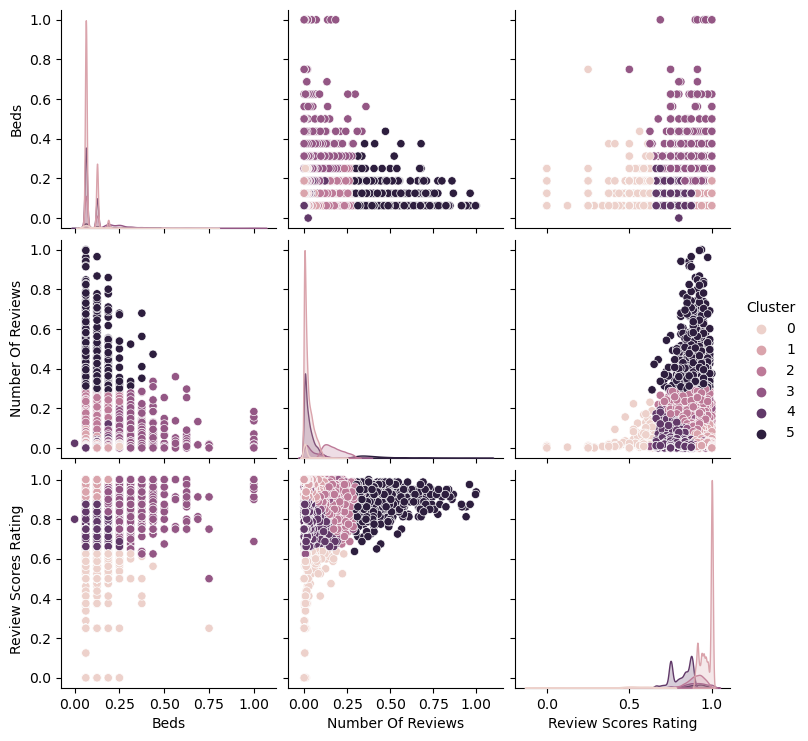

In [51]:
# 4

sns.pairplot(data=norm, hue="Cluster")

In [52]:
# 5

adf["Cluster"] = model.labels_
adf.loc[:, ["Price", "Cluster"]].groupby("Cluster").describe()

# cluster 3 has the highest average price by far, leaning towards more than double the price of most other clusters. While it doesn't have a huge maximum price, the middle 50% of the data for cluster 3 is within a much higher and wider range than the rest of the clusters. 

Price                                                             
           count        mean         std   min    25%    50%     75%      max
Cluster                                                                      
0          632.0  133.587025  215.505565  25.0   65.0   99.0  151.25   5000.0
1        10529.0  152.287682  147.227153  10.0   85.0  130.0  190.00  10000.0
2         3022.0  141.489411   83.936285  22.0   87.0  125.0  175.00   1000.0
3         1626.0  293.528905  262.934691  27.0  150.0  229.0  350.00   4500.0
4         5554.0  131.631797  102.758887  20.0   75.0  110.0  169.00   5000.0
5          792.0  133.224747   83.088608  27.0   80.0  110.0  167.50    875.0

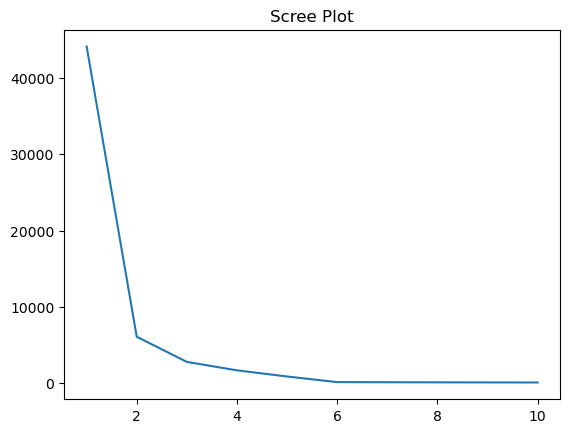

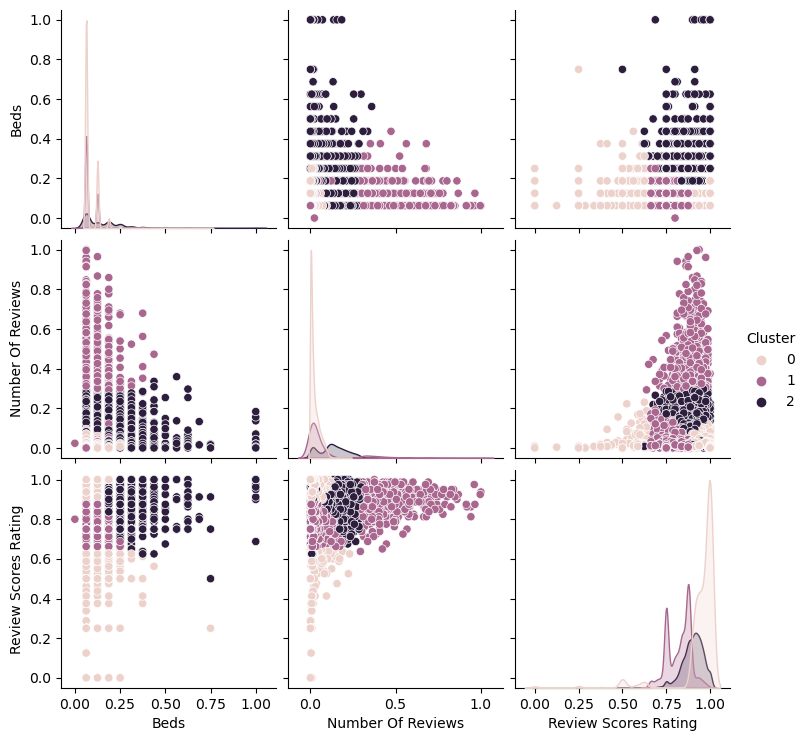

Price                                                           
           count        mean         std   min   25%    50%    75%      max
Cluster                                                                    
0        11161.0  151.228743  151.963553  10.0  85.0  129.0  190.0  10000.0
1         6346.0  131.830602  100.510035  20.0  75.0  110.0  169.0   5000.0
2         4648.0  194.677065  184.430237  22.0  99.0  150.0  225.0   4500.0

In [53]:
# 6

karr = np.arange(1, 11)
sse = np.zeros(10)
for k in range(10):
    model = KMeans(n_clusters=k + 1, max_iter=300, n_init=10, random_state=0).fit(norm)
    sse[k] = model.inertia_

sns.lineplot(x=karr, y=sse).set_title("Scree Plot")
plt.show()

model = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=0).fit(norm)
norm["Cluster"] = model.labels_
sns.pairplot(data=norm, hue="Cluster")
plt.show()
adf["Cluster"] = model.labels_
adf.loc[:, ["Price", "Cluster"]].groupby("Cluster").describe()

# cluster 2 has the highest average price and the smallest range. It seems like high bed count, followed by low number of ratings, then followed by high rating score is the order of variables that affect the average price the most?

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [54]:
# 1

def create_data(noise, N=50):
    np.random.seed(100)
    x1 = np.array([np.random.normal(1, noise, N), np.random.normal(1, noise, N)])
    x2 = np.array([np.random.normal(3, noise, N), np.random.normal(2, noise, N)])
    x3 = np.array([np.random.normal(5, noise, N), np.random.normal(3, noise, N)])
    gdf1 = pd.DataFrame({"x1": x1[0, :], "x2": x1[1, :], "group": "a"})
    gdf2 = pd.DataFrame({"x1": x2[0, :], "x2": x2[1, :], "group": "b"})
    gdf3 = pd.DataFrame({"x1": x3[0, :], "x2": x3[1, :], "group": "c"})
    return pd.concat([gdf1, gdf2, gdf3], axis=0)

df0_125 = create_data(0.125)
df0_25 = create_data(0.25)
df0_5 = create_data(0.5)
df1_0 = create_data(1.0)
df2_0 = create_data(2.0)

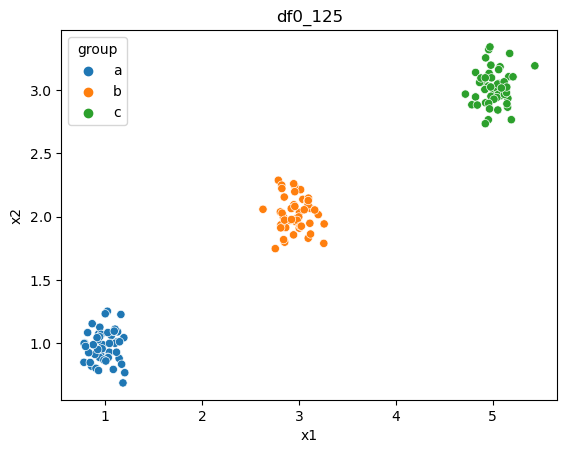

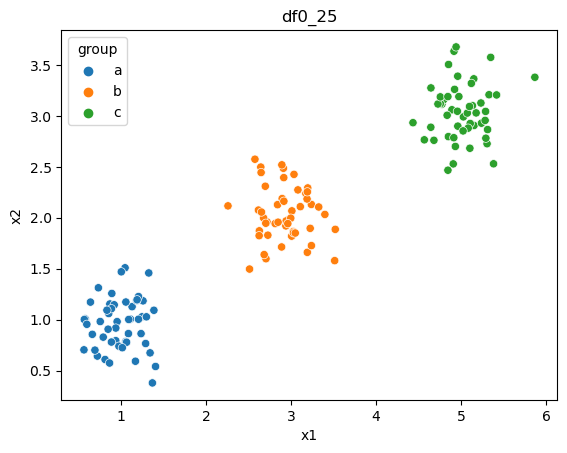

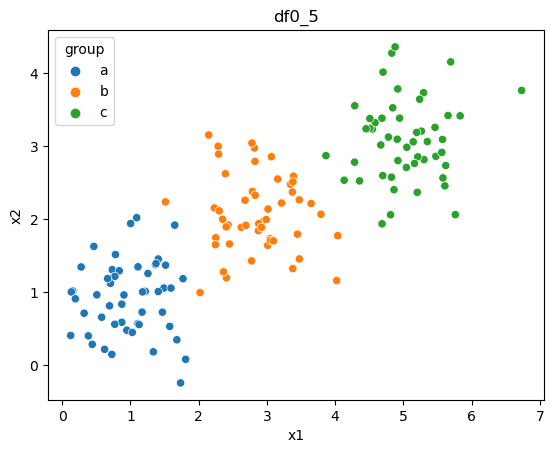

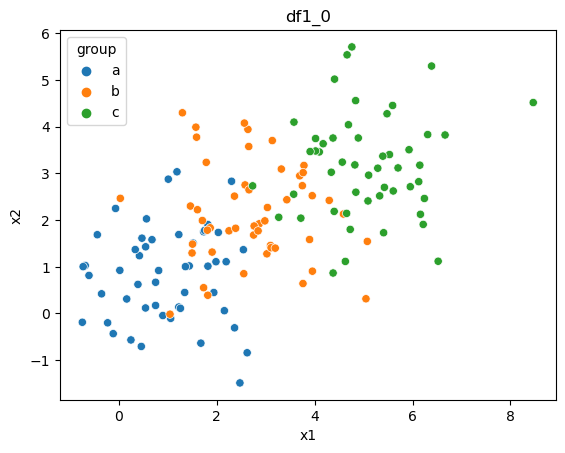

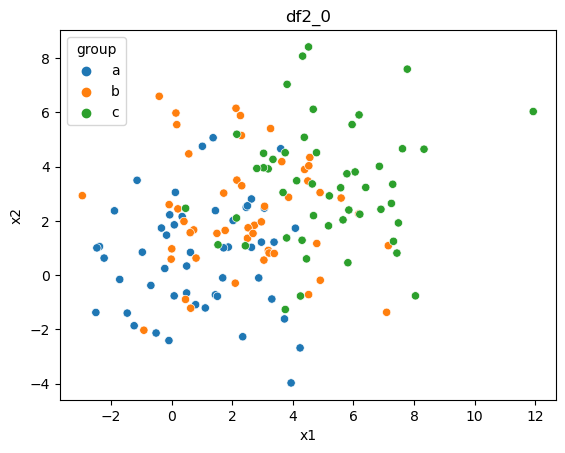

In [55]:
# 2

sns.scatterplot(data=df0_125, x="x1", y="x2", hue="group").set_title("df0_125")
plt.show()
sns.scatterplot(data=df0_25, x="x1", y="x2", hue="group").set_title("df0_25")
plt.show()
sns.scatterplot(data=df0_5, x="x1", y="x2", hue="group").set_title("df0_5")
plt.show()
sns.scatterplot(data=df1_0, x="x1", y="x2", hue="group").set_title("df1_0")
plt.show()
sns.scatterplot(data=df2_0, x="x1", y="x2", hue="group").set_title("df2_0")
plt.show()

# as noise increases the clusters become more intermixed with each other and it becomes almost impossible to separate out which points are in which clusters when noise=2.0

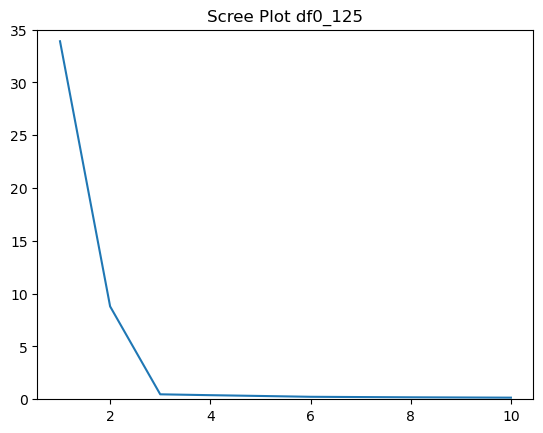

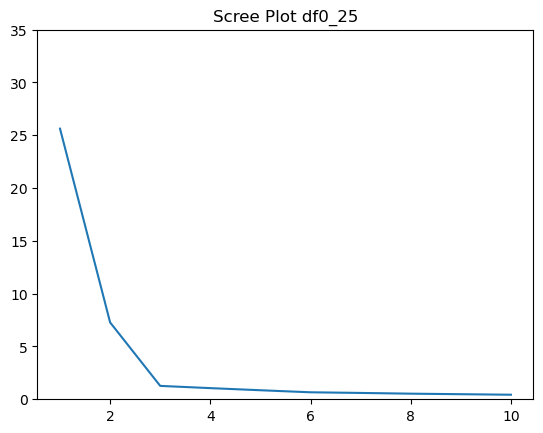

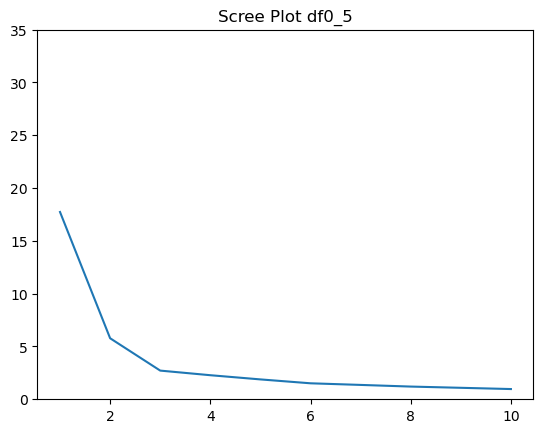

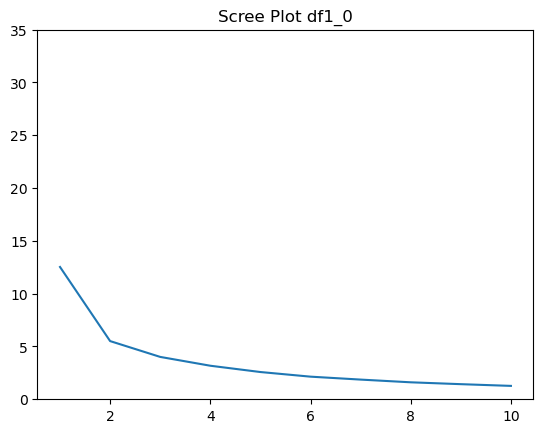

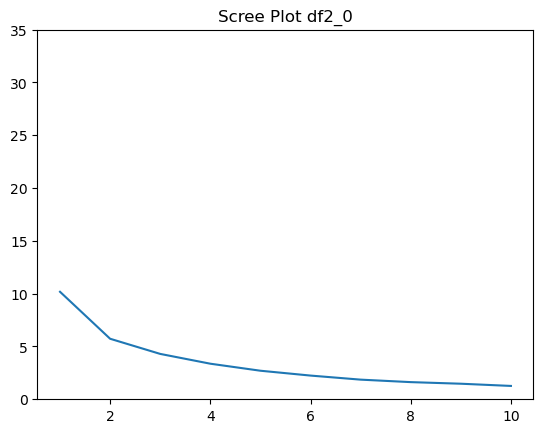

In [56]:
def scree(df, name):
    x = df.loc[:, ["x1", "x2"]].apply(maxmin)
    karr = np.arange(1, 11)
    sse = np.zeros(10)
    for k in range(10):
        model = KMeans(n_clusters=k + 1, max_iter=300, n_init=10, random_state=0).fit(x)
        sse[k] = model.inertia_

    sns.lineplot(x=karr, y=sse).set_title(f"Scree Plot {name}")
    plt.gca().set_ylim(0, 35)
    plt.show()

scree(df0_125, "df0_125")
scree(df0_25, "df0_25")
scree(df0_5, "df0_5")
scree(df1_0, "df1_0")
scree(df2_0, "df2_0")

# as noise grows the elbow becomes less obvious, and at n=1.0 and n=2.0 it becomes hard/impossible to pick out an elbow point, thus preventing us from definitively selecting an optimal k

In [ ]:
# 4

# the elbow is the point at which the marginal utility of increasing k to another cluster becomes insignificant. When noise is increased, the clusters start to overlap, so a lack of a clear elbow signifies that the clusters lack distinction from each other and/or another approach to deciding k should be used. Thus, a scree plot is only able to produce a clear elbow to be used when the noise level is small enough such that each cluster remains disjoint from each other, and will be ineffective when clusters are inseparable from one another.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which? 

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?